# Electric Vehicle Market Segmentation Analysis Focusing on Valued EV selection
This notebook performs an in-depth analysis and visualization to understand the market segmentation of electric vehicles (EVs). The aim is to explore the dataset, identify key trends, and apply clustering techniques to segment the EV market.

## Step 1: Import Necessary Libraries
We start by importing the essential libraries required for data manipulation, visualization, and clustering analysis.

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")


In [3]:
import warnings
warnings.filterwarnings("ignore")

## Step 2: Load the Dataset
We load the dataset that contains various attributes of electric vehicles, which will be used for further analysis and segmentation.

In [4]:
# Load the dataset
df = pd.read_csv("Electric-car-data.csv")


##Step 3: Explore the Data
Explore the dataset by displaying the first few rows, checking data types, and generating summary statistics.

In [5]:
# Display the first 10 rows of the dataset
df.head(10)

# Display information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

# Check the shape of the dataset
df.shape

# Select a subset of columns for initial exploration
ilocfunc = df.iloc[:,0:9]
ilocfunc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceINR         103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB
None
         AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm       Seats  \
count  103.0000

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD
2,Polestar,2,4.7,210,400,181,620,Yes,AWD
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD
4,Honda,e,9.5,145,170,168,190,Yes,RWD
...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD


##Step 4: Data Cleaning
Check for missing or duplicate values in the dataset and address them before proceeding with further analysis.

In [6]:
# Check for missing values in the dataset
df.isnull().sum()

# Check for duplicate rows in the dataset
df.duplicated().sum()

# Display column names
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceINR'],
      dtype='object')

##Step 5: Data Visualization
Visualize the data using various plots to identify key trends and insights.

Scatter Plot of Price Distribution

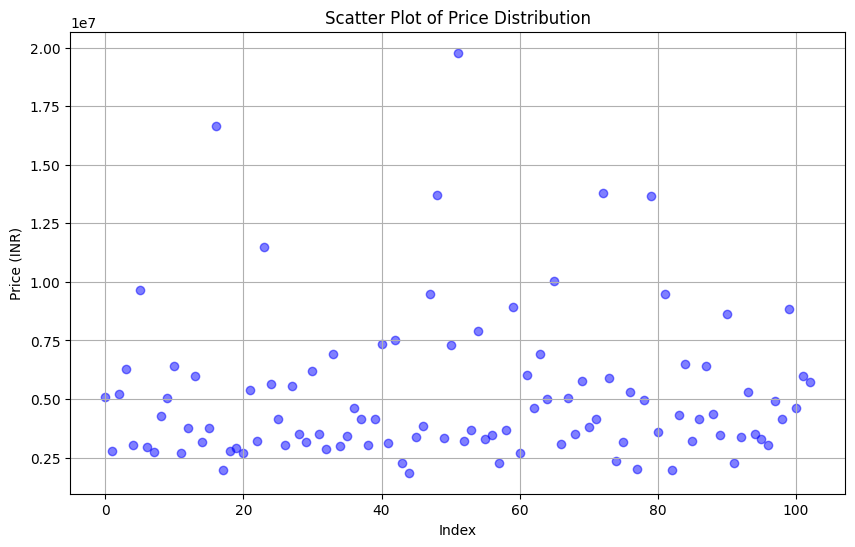

In [7]:
# Adjust the size of the plot
plt.figure(figsize=(10, 6))

# Create scatter plot
plt.scatter(range(len(df)), df["PriceINR"], color='blue', alpha=0.5)
plt.xlabel("Index")
plt.ylabel("Price (INR)")
plt.title("Scatter Plot of Price Distribution")
plt.grid(True)

plt.show()

Line Chart of Price vs. Range

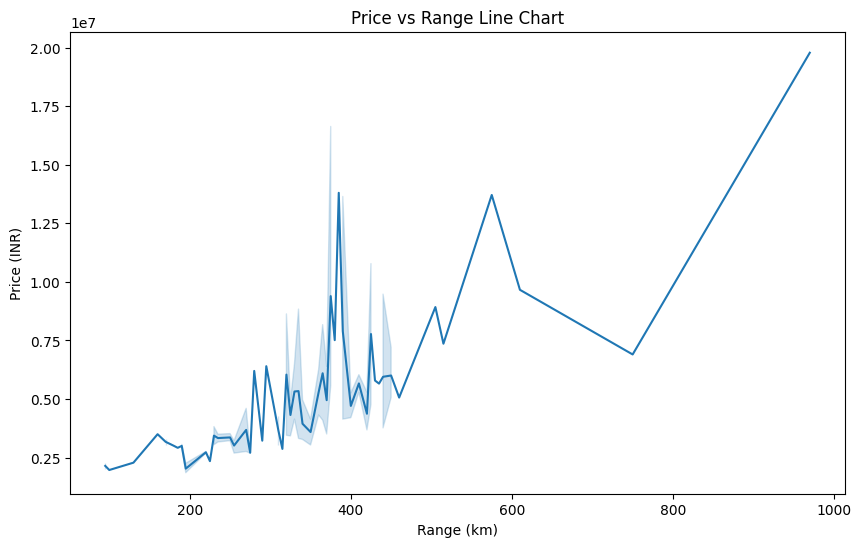

In [8]:
# Adjust the size of the plot
plt.figure(figsize=(10, 6))

# Create line chart
sns.lineplot(x="Range_Km", y="PriceINR", data=df)
plt.xlabel("Range (km)")
plt.ylabel("Price (INR)")
plt.title("Price vs Range Line Chart")

plt.show()


Violin Plot of Price by Power Train

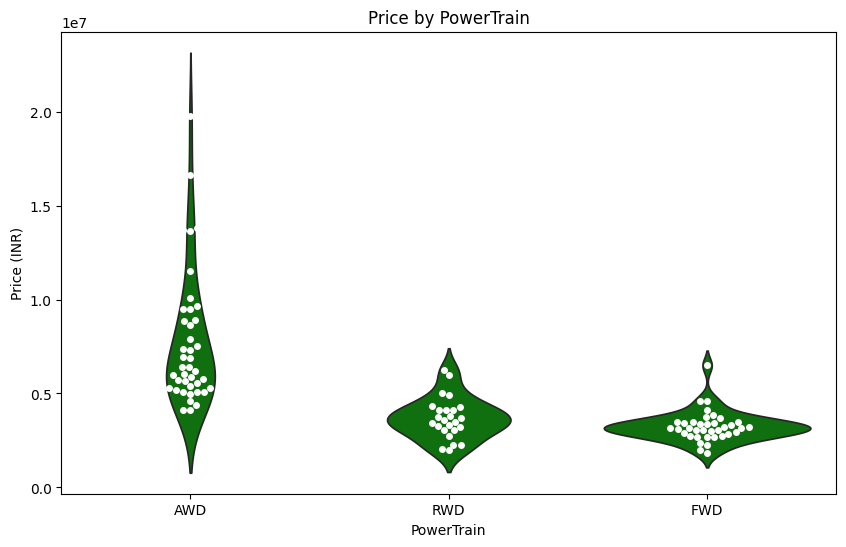

In [9]:
# Adjust the size of the plot
plt.figure(figsize=(10, 6))

# Create violin plot
sns.violinplot(x="PowerTrain", y="PriceINR", data=df, color="green", inner=None)
sns.swarmplot(x="PowerTrain", y="PriceINR", data=df, color="white", edgecolor="gray")
plt.title('Price by PowerTrain')
plt.xlabel('PowerTrain')
plt.ylabel('Price (INR)')

plt.show()


Bar Graph of Top Speed by Brand

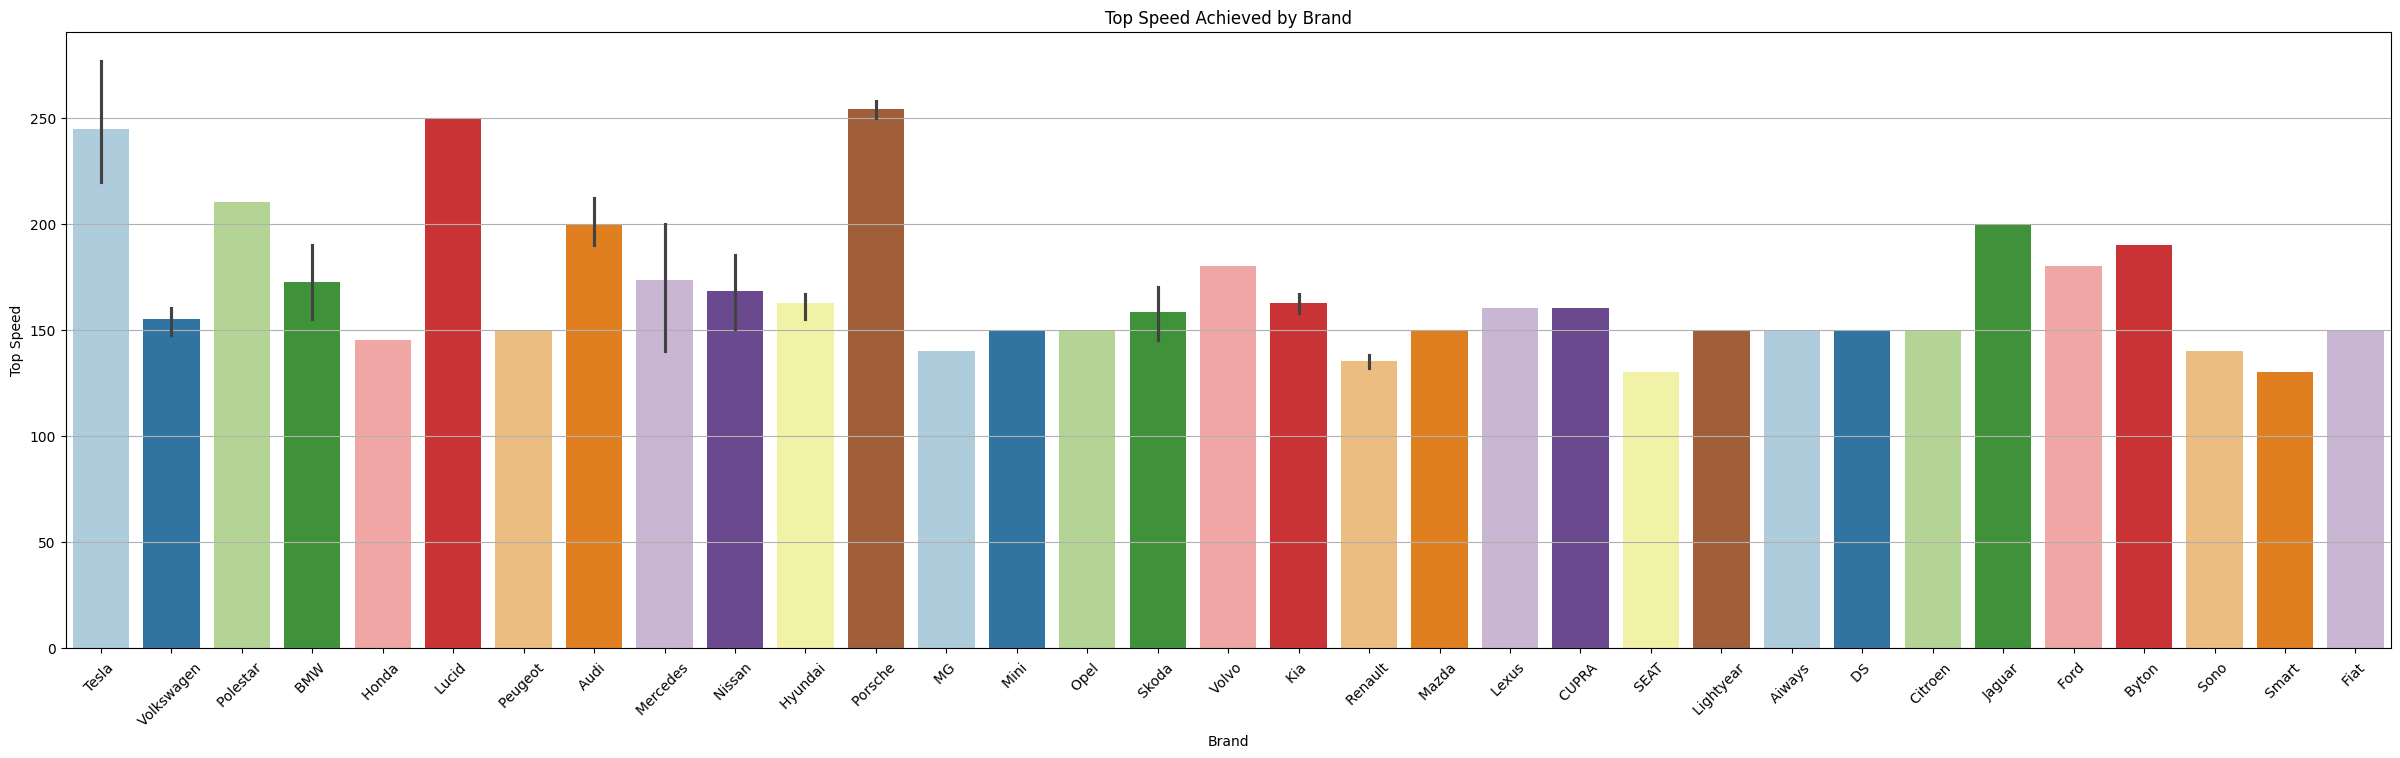

In [10]:
# Adjust the figure size
plt.figure(figsize=(30, 8))
sns.barplot(x='Brand', y='TopSpeed_KmH', data=df, palette='Paired')
plt.grid(axis='y')
plt.title('Top Speed Achieved by Brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)
plt.show()


Doughnut Chart for Plug Type

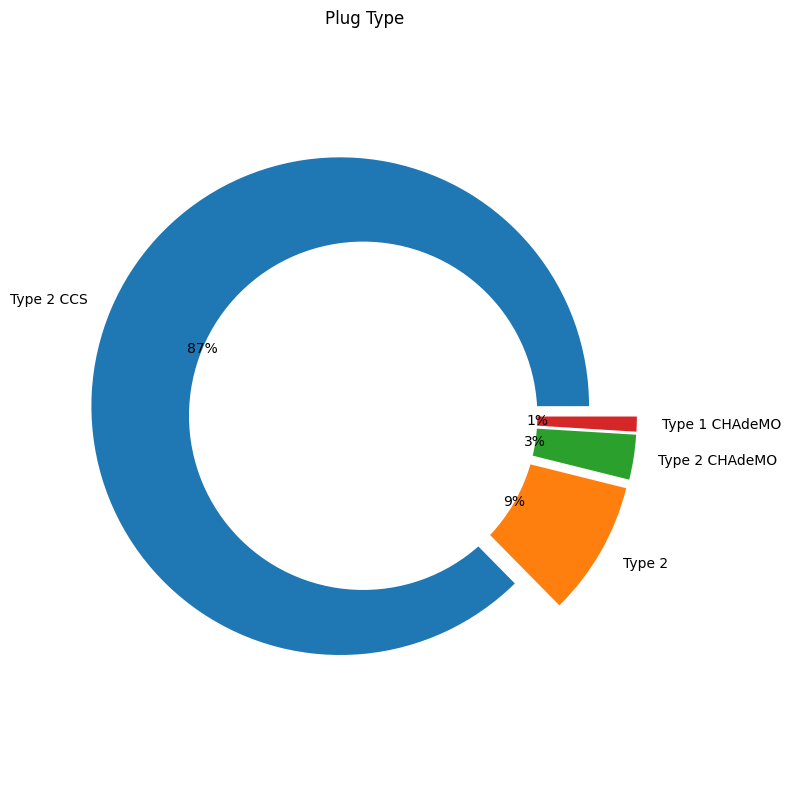

In [11]:
# Import necessary library for plotting
import matplotlib.pyplot as plt

# Adjust the figure size
plt.figure(figsize=(8, 8))

# Create pie chart
plt.pie(df['PlugType'].value_counts(), labels=df['PlugType'].value_counts().index, autopct='%.0f%%', explode=(.1, .1, .1, .1))

# Draw a white circle in the center to create a doughnut chart effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Plug Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


Line Charts for Various Features

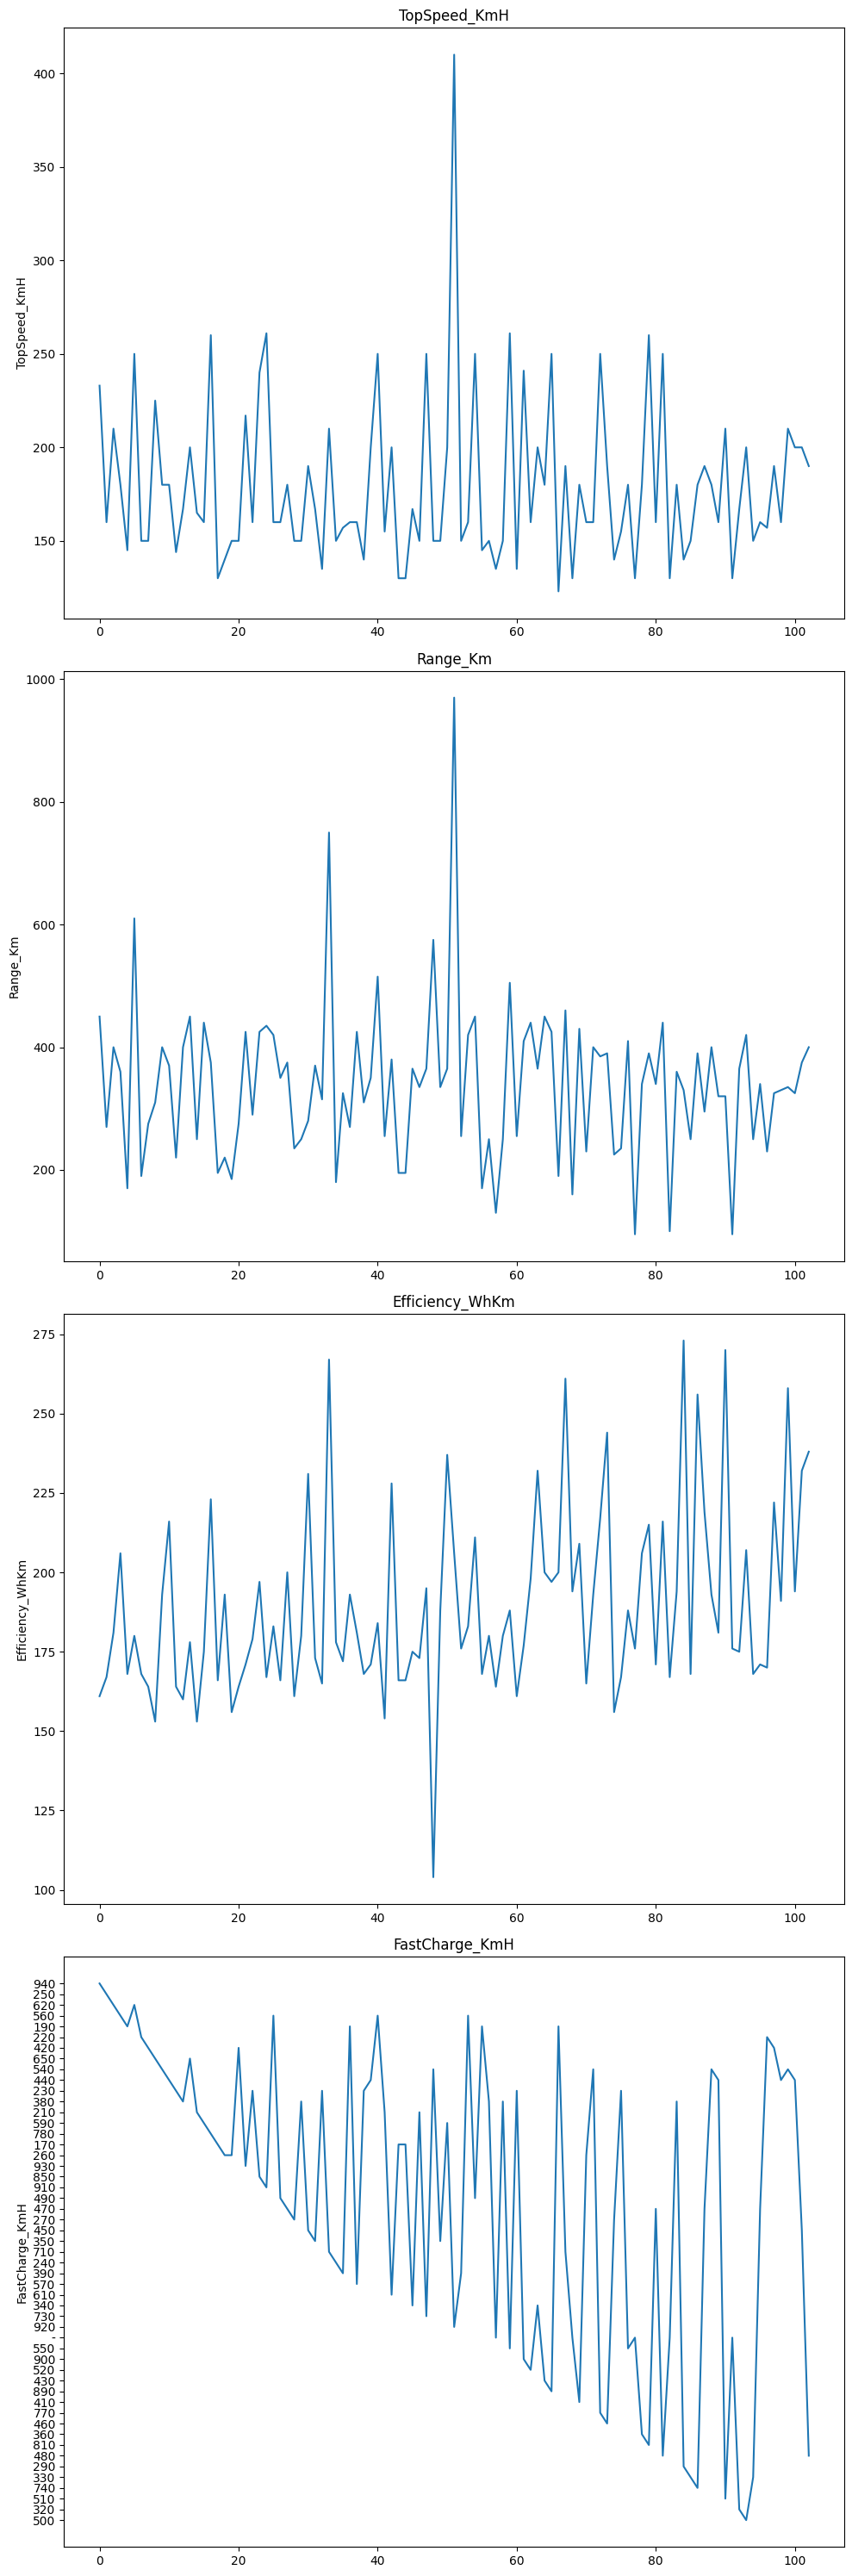

In [12]:
# Adjust the figure size
plt.figure(figsize=(10, 30))
n = 0

# Plot line charts for various features
for i, x in enumerate(['TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH'], 1):
    plt.subplot(4, 1, i)
    sns.lineplot(data=df[x])
    plt.title(f'{x}')
    plt.xlabel('')  # Remove x-axis label for better layout

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


## Step 6: K-Means Clustering
Apply K-Means clustering to segment the data based on selected features.

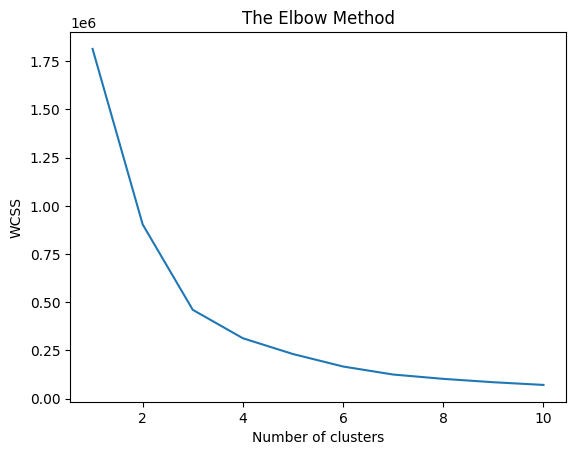

In [13]:
# Extracting relevant features for clustering
X = df.iloc[:, [3, 4]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##Step 7: Convex Clustering
Perform convex clustering and visualize the results.

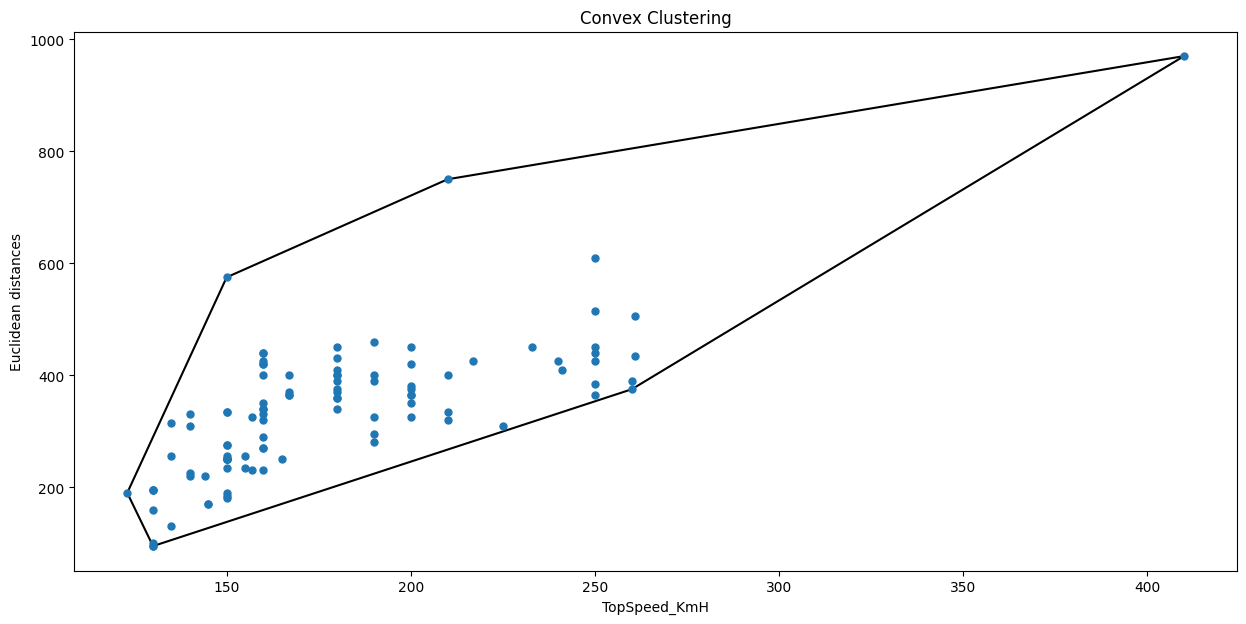

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull

# Perform convex clustering
hull = ConvexHull(X)

# Plot the convex hull
plt.figure(figsize=(15, 7))
for simplex in hull.simplices:
    plt.plot(X[simplex, 0], X[simplex, 1], 'k-')  # Plot the edges of the convex hull

plt.plot(X[:, 0], X[:, 1], 'o', markersize=5)  # Plot the data points
plt.title('Convex Clustering')
plt.xlabel('TopSpeed_KmH')
plt.ylabel('Euclidean distances')
plt.show()

##Step 8: Loading and Analyzing New Dataset
Load and analyze a new dataset to understand customer behavior.

In [15]:
# Import necessary libraries
import plotly.express as px
!pip install kaleido
import kaleido

# Load the new dataset
data = pd.read_csv("behavioural_dataset.csv")

# Describe the dataset
data.describe()

# Check for missing values
print(pd.isnull(data).sum())

# Rename columns for clarity
data.rename(columns={'Personal loan':'Car_Loan'}, inplace=True)
data.rename(columns={'Price':'EV_Price'}, inplace=True)
data.head()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.3 MB/s eta 0:00:00
Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64


,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


##Count Plot for Marital Status and Car Loan

<Figure size 1000x600 with 0 Axes>

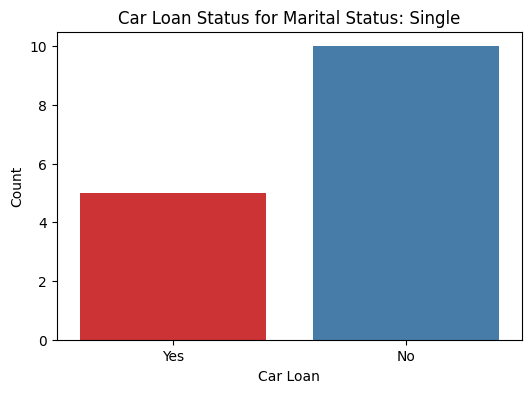

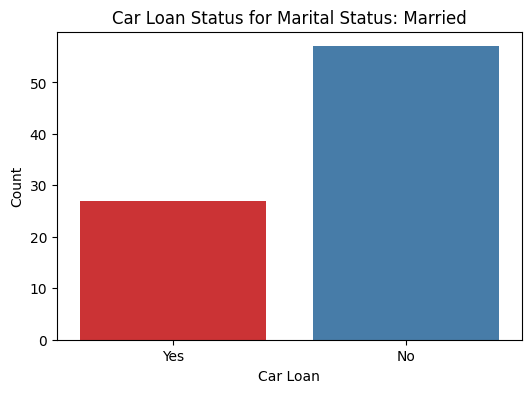

In [16]:
# List unique marital statuses
marital_statuses = data['Marrital Status'].unique()

# Plot count plots for each marital status category
plt.figure(figsize=(10, 6))
for status in marital_statuses:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Car_Loan', data=data[data['Marrital Status'] == status], palette='Set1')
    plt.title(f'Car Loan Status for Marital Status: {status}')
    plt.xlabel('Car Loan')
    plt.ylabel('Count')
    plt.show()


##Doughnut Chart for Car Loan Status

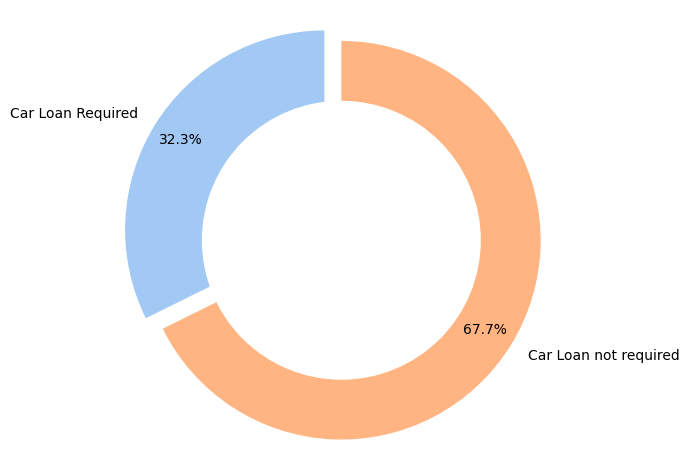

In [17]:
# Getting labels and data
labels = ['Car Loan Required', 'Car Loan not required']
loan_status = [data.query('Car_Loan == "Yes"').Car_Loan.count(), data.query('Car_Loan == "No"').Car_Loan.count()]

# Define explode for doughnut effect
explode = [0.1, 0]

# Define color palette
palette_color = sns.color_palette('pastel')

# Plotting data on doughnut chart
fig, ax = plt.subplots()
ax.pie(loan_status, labels=labels, colors=palette_color, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

# Draw a circle at the center to make it a doughnut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Displaying the doughnut chart
plt.tight_layout()
plt.show()


##Line Charts for Consumer Features

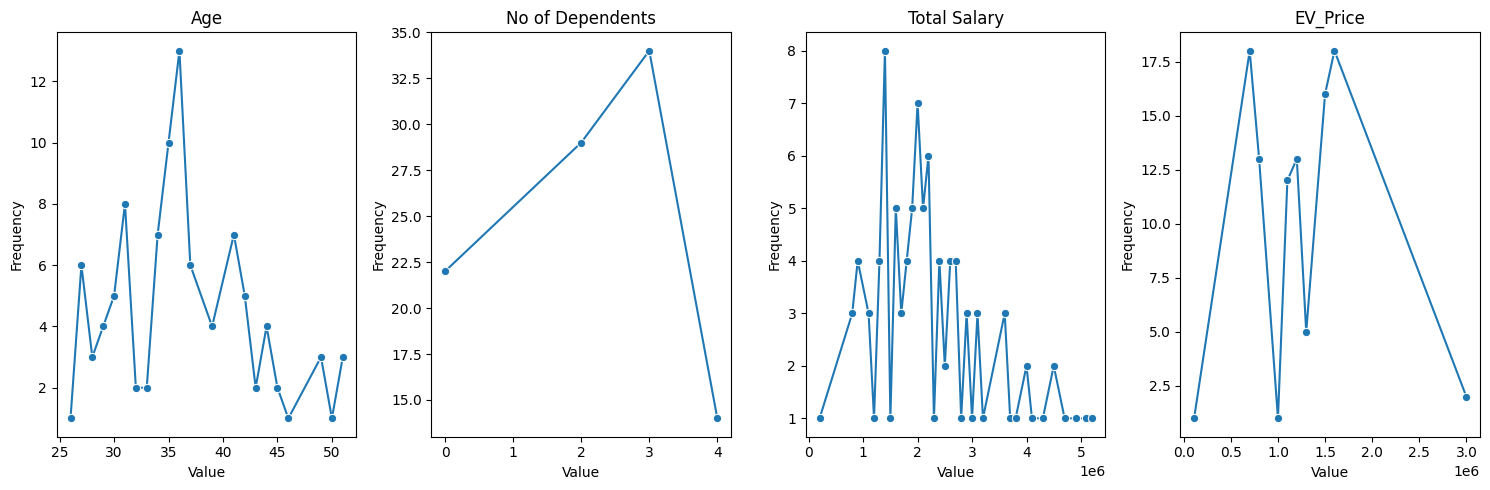

In [19]:
# Plotting frequency of each entry for consumer features with line charts
plt.figure(figsize=(15, 5))

# List of consumer features
consumer_features = ['Age', 'No of Dependents', 'Total Salary', 'EV_Price']

# Iterate through each feature and plot line chart
for i, feature in enumerate(consumer_features, 1):
    plt.subplot(1, 4, i)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.lineplot(data=data[feature].value_counts().sort_index(), marker='o')
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


##Step 9: K-Prototypes Clustering
Apply K-Prototypes clustering to the behavioral dataset for customer segmentation.

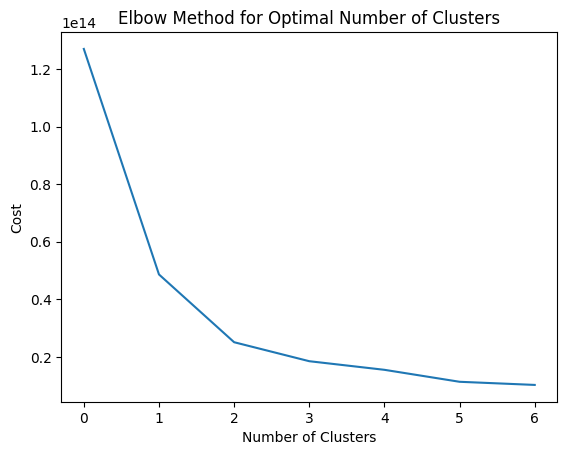

In [20]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes

# Display the first few rows of the dataset
data.head()

# Define the features for clustering
cluster_features = list(data.columns)
cluster_data = data[cluster_features].values

# Identify categorical features (adjust indices as needed)
categorical_features = [1, 2, 3, 5]  # Indices of categorical features

# Finding the optimal number of clusters using the Elbow Method
cost = []
for num_clusters in range(1, 8):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(cluster_data, categorical=categorical_features)
    cost.append(kproto.cost_)
plt.plot(cost)
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")
plt.show()


##Segregate Each Cluster
After determining the optimal number of clusters, we segregate the data into different clusters.

In [21]:
# Apply K-Prototypes clustering with the chosen number of clusters
kproto = KPrototypes(n_clusters=2, verbose=2, max_iter=20)
clusters = kproto.fit_predict(cluster_data, categorical=categorical_features)

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Segregate the data into clusters
Cluster_0 = data[data.Cluster == 0]
Cluster_1 = data[data.Cluster == 1]


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 5, ncost: 49272046548799.43
Run: 1, iteration: 2/20, moves: 4, ncost: 48631729380526.18
Run: 1, iteration: 3/20, moves: 0, ncost: 48631729380526.18
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 25, ncost: 59534589041758.66
Run: 2, iteration: 2/20, moves: 18, ncost: 50447073534650.24
Run: 2, iteration: 3/20, moves: 3, ncost: 50057040964014.66
Run: 2, iteration: 4/20, moves: 1, ncost: 50020391397205.32
Run: 2, iteration: 5/20, moves: 0, ncost: 50020391397205.32
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 23, ncost: 52302715084203.81
Run: 3, iteration: 2/20, moves: 8, ncost: 50057040964014.66
Run: 3, iteration: 3/20, moves: 1, ncost: 50020391397205.32
Run: 3, iteration: 4/

##Analyze EV Price vs Other Factors
Compare the average EV price and its relationship with other factors like salary, age, and number of dependents across clusters.

Average EV Price: 1194040.4040404041


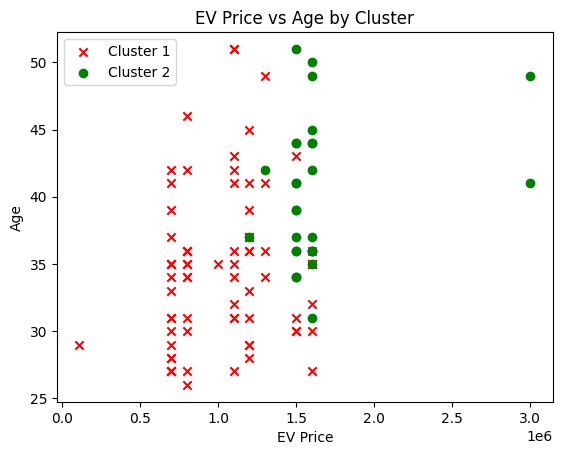

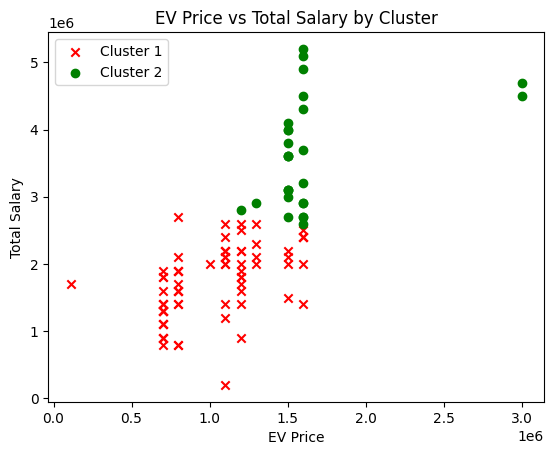

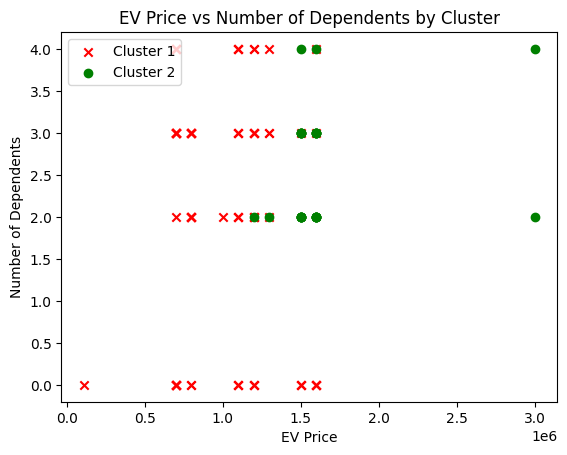

In [22]:
# Display the mean EV price
print(f"Average EV Price: {data.EV_Price.mean()}")

# Plot the relationship between EV Price and Age for each cluster
plt.scatter(Cluster_0.EV_Price, Cluster_0['Age'], color='red', marker='x', label='Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Age'], color='green', label='Cluster 2')
plt.legend(loc="upper left")
plt.xlabel('EV Price')
plt.ylabel('Age')
plt.title('EV Price vs Age by Cluster')
plt.show()

# Plot the relationship between EV Price and Total Salary for each cluster
plt.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'], color='red', marker='x', label='Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'], color='green', label='Cluster 2')
plt.legend(loc="upper left")
plt.xlabel('EV Price')
plt.ylabel('Total Salary')
plt.title('EV Price vs Total Salary by Cluster')
plt.show()

# Plot the relationship between EV Price and Number of Dependents for each cluster
plt.scatter(Cluster_0.EV_Price, Cluster_0['No of Dependents'], color='red', marker='x', label='Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['No of Dependents'], color='green', label='Cluster 2')
plt.legend(loc="upper left")
plt.xlabel('EV Price')
plt.ylabel('Number of Dependents')
plt.title('EV Price vs Number of Dependents by Cluster')
plt.show()
